# Exploring bike share data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
> This is randomly selected data related to bike share systems for the first six months of 2017 in three large cities: Chicago, New York City, and Washington, DC.

|   **Column**  |                    **Description**                    |
|:-------------:|:-----------------------------------------------------:|
|       X       |                      Index value                      |
|   Start.Time  |                Trip start day and time                |
|    End.Time   |                 Trip end day and time                 |
| Trip.Duration |              Duration of trip in seconds              |
| Start.Station |                   Trip start station                  |
|  End.Station  |                    Trip end station                   |
|   User.Type   |          Rider type (Subscriber or Customer)          |
|     Gender    |    Male or Female (Chicago and New York City only)    |
|   Birth.Year  | User's year of birth (Chicago and New York City only) |

### Questions for Analysis

- What is the most common month for bike share use?
- What is the most common start station?
- What are the counts of each user type?

### Import necessary libraries

In [1]:
library(tidyverse)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



### Read in csv files

In [2]:
ny = read.csv('./data/new_york_city.csv')
wash = read.csv('./data/washington.csv')
chi = read.csv('./data/chicago.csv')

In [3]:
# Set options
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

<a id='wrangling'></a>
## Data Wrangling

<ul>
    <li><a href="#ny">New York City</a></li>
    <li><a href="#chi">Chicago</a></li>
    <li><a href="#wash">Washington, DC</a></li>
</ul>

<a id='ny'></a>
### Explore the NY dataset

In [4]:
# Find number of rows and columns
dim(ny) 

[1] 54770     9

In [5]:
# Check column names
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [6]:
# Check top 6 rows of dataset
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [7]:
# Check bottom 6 rows of dataset
tail(ny) 

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
54765,1293888,2017-02-23 06:14:14,2017-02-23 06:23:32,558,E 27 St & 1 Ave,E 47 St & Park Ave,Subscriber,Male,1984
54766,642855,2017-01-28 16:44:18,2017-01-28 16:48:18,240,W 52 St & 9 Ave,9 Ave & W 45 St,Subscriber,Male,1991
54767,2157959,2017-03-29 06:30:35,2017-03-29 06:32:41,125,W 84 St & Columbus Ave,W 87 St & Amsterdam Ave,Subscriber,Male,1984
54768,5679624,2017-06-11 12:52:27,2017-06-11 12:58:35,367,8 Ave & W 33 St,W 45 St & 8 Ave,Subscriber,Male,1954
54769,6762960,2017-06-30 07:48:34,2017-06-30 08:17:16,1722,Cathedral Pkwy & Broadway,Broadway & W 51 St,Subscriber,Male,1974
54770,6078570,2017-06-18 16:20:21,201,NA,,,,,NA


In [8]:
# Check structure of data including datatypes
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`End.Time` has a value of 201 instead of a date and time

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

`Gender` has 3 levels. We expect Male and Female and some of the values are missing.

In [9]:
# Create object to store every row that has at least one missing value
ny_missing <- !complete.cases(ny)

# Show all the rows with missing data
ny[ny_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
9,2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,,NA
11,2287178,2017-04-02 14:37:20,2017-04-02 14:56:12,1131,Bank St & Washington St,Little West St & 1 Pl,Customer,,NA
20,5857,2017-01-01 13:32:39,2017-01-01 13:49:57,1038,W 22 St & 8 Ave,W 45 St & 6 Ave,Customer,,NA
24,2497952,2017-04-08 13:39:48,2017-04-08 14:04:24,1476,Dean St & Hoyt St,Plaza St West & Flatbush Ave,Customer,,NA
33,3676202,2017-05-02 21:43:28,2017-05-02 22:29:15,2746,Old Fulton St,Broadway & E 14 St,Customer,,NA
37,1975396,2017-03-22 08:56:43,2017-03-22 09:07:13,630,Broadway & W 29 St,E 17 St & Broadway,Customer,,NA
39,5630375,2017-06-10 14:03:43,2017-06-10 14:05:00,76,Bayard St & Baxter St,Bayard St & Baxter St,Customer,,NA
53,2897347,2017-04-16 15:23:43,2017-04-16 15:44:16,1233,Cleveland Pl & Spring St,S 5 Pl & S 4 St,Customer,,NA
61,3847598,2017-05-06 15:58:00,2017-05-06 16:31:17,1997,Front St & Maiden Ln,Old Fulton St,Customer,,NA
66,6018157,2017-06-17 08:06:57,2017-06-17 08:35:44,1727,Pier 40 - Hudson River Park,Pier 40 - Hudson River Park,Customer,,NA


Most of the missing values appears to be coming from `Gender` and `Birth.Year`.

`X` ID of 6078570 is missing values or has incorrect values in almost all the columns. This record will need to be removed completely.

In [10]:
# Count duplicated rows
sum(duplicated(ny))

[1] 0

<a id='chi'></a>
### Explore the Chicago dataset

In [11]:
# Find number of rows and columns
dim(chi) 

[1] 8630    9

In [12]:
# Check column names
names(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [13]:
# Check top 6 rows of dataset
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [14]:
# Check bottom 6 rows of dataset
tail(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8625,397518,2017-03-24 16:52:16,2017-03-24 16:57:57,341,Southport Ave & Waveland Ave,Southport Ave & Waveland Ave,Subscriber,Male,1990
8626,879494,2017-05-18 05:06:50,2017-05-18 05:22:10,920,Artesian Ave & Hubbard St,Wacker Dr & Washington St,Subscriber,Male,1959
8627,360389,2017-03-19 07:21:29,2017-03-19 07:27:18,349,Wabash Ave & Roosevelt Rd,Wells St & Polk St,Subscriber,Male,1987
8628,858496,2017-05-16 17:03:24,2017-05-16 17:31:12,1668,Ashland Ave & Harrison St,Wells St & Concord Ln,Subscriber,Male,1963
8629,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977
8630,1230561,2017-06-11 14:52:13,2017-06-11 15:42:33,3020,Waba,,,,NA


In [15]:
# Check structure of data including datatypes
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`End.Station` has a missing value and will need to be investigated when cleaning.

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

`Gender` has 3 levels. We expect Male and Female and some of the values are missing.

In [16]:
# Create object to store every row that has at least one missing value
chi_missing <- !complete.cases(chi)

# Show all the rows with missing data
chi[chi_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8,65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,,NA
20,475456,2017-04-08 11:37:55,2017-04-08 11:51:55,840,Adler Planetarium,Burnham Harbor,Customer,,NA
32,1539334,2017-06-30 10:56:50,2017-06-30 11:40:20,2610,McCormick Place,Adler Planetarium,Customer,,NA
36,243879,2017-02-22 15:33:56,2017-02-22 15:54:07,1211,Streeter Dr & Grand Ave,Theater on the Lake,Customer,,NA
39,720062,2017-05-03 16:27:08,2017-05-03 16:45:15,1087,Clark St & Elm St,Michigan Ave & Pearson St,Customer,,NA
41,1314009,2017-06-16 19:34:44,2017-06-16 20:16:23,2499,State St & Van Buren St,McClurg Ct & Erie St,Customer,,NA
45,1372709,2017-06-20 16:14:15,2017-06-20 16:42:26,1691,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,,NA
53,157790,2017-02-11 15:11:34,2017-02-11 16:30:04,4710,McCormick Place,Wabash Ave & Wacker Pl,Customer,,NA
57,1526760,2017-06-29 13:50:47,2017-06-29 14:10:04,1157,Lake Shore Dr & Belmont Ave,Lake Shore Dr & North Blvd,Customer,,NA
62,1539175,2017-06-30 10:44:24,2017-06-30 11:11:03,1599,Millennium Park,Streeter Dr & Grand Ave,Customer,,NA


Most of the missing values appears to be coming from `Gender` and `Birth.Year`.

`X` ID of 1230561 is missing values. This record will need to be removed completely.

In [17]:
# Count duplicated rows
sum(duplicated(chi))

[1] 0

<a id='wash'></a>
### Explore the Washington, DC dataset

In [18]:
# Find number of rows and columns
dim(wash) 

[1] 89051     7

In [19]:
# Check column names
names(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [20]:
# Check top 6 rows of dataset
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [21]:
# Check top 6 rows of dataset
tail(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89046,1484340,2017-06-10 10:58:09,2017-06-10 11:25:58,1669.700,M St & New Jersey Ave SE,4th St & Madison Dr NW,Customer
89047,555788,2017-03-22 18:46:00,2017-03-22 19:04:00,1082.789,8th & H St NW,21st & I St NW,Subscriber
89048,739004,2017-04-09 04:00:22,2017-04-09 04:09:54,571.879,Eckington Pl & Q St NE,Columbus Circle / Union Station,Subscriber
89049,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404.152,1st & M St NE,1st & Rhode Island Ave NW,Subscriber
89050,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer
89051,132,,,NA,,,


In [22]:
# Check structure of data including datatypes
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`Start.Station` and `End.Station` have missing values and will need to be investigated when cleaning.

`Trip.Duration` is a num instead of int in the `Chicago` and `New York City` datasets.

`End.Station` has a missing value and will need to be investigated when cleaning.

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

In [23]:
# Create object to store every row that has at least one missing value
wash_missing <- !complete.cases(wash)

# Show all the rows with missing data
wash[wash_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89051,132,,,NA,,,


`X` ID of 132 is missing values. This record will need to be removed completely.

In [24]:
# Count duplicated rows
sum(duplicated(wash))

[1] 0

### Data Cleaning

To help answer the analysis questions each dataset will need to be cleaned. The following steps will be taken to clean the data:

- Remove columns that are not needed to answer analysis questions
- Update and transform data in columns for easier understanding and consistency
- Remove records with incorrect or missing values
- Add new columns to assist with answering questions
- Merge each new clean dataset into a single dataset

In [26]:
# Make copies of all the datasets before cleaning
# Creates a copy with a different memory address
# https://rdrr.io/cran/data.table/man/copy.html

ny_clean <- data.table::copy(ny)
chi_clean <- data.table::copy(chi)
wash_clean <- data.table::copy(wash)

In [27]:
# Create function to help format date columns in the datasets

create_date_cols <- function(df) {
    #' Create indvidual date columns for start and end dates
    #'
    #' Given a dataframe with Start.Date and End.Date columns
    #' create start_date and end_date columns
    #' @param dataframe

    # Add start_date column with date from Start.Time
    df$start_date <- as.Date(df$Start.Time)

    # Add end_date column with date from End.Time
    df$end_date <- as.Date(df$End.Time)

    return(df)
}

In [28]:
# Create function to help create month, day, and year cols

create_mdy_cols <- function(df) {
    #' Create month, day, and year columns
    #' 
    #' Given a dataframe with start_date and end_date columns
    #' create month, day, and year columns for both start and end
    #' @param dataframe

    # Create mdy cols for start_date
    # Create start_month column
    df$start_month <- month(df$start_date)

    # Create start_day column
    df$start_day <- wday(df$start_date)

    # Create start_year column
    df$start_year <- year(df$start_date)

    # Create mdy cols for end_date
    # Create start_month column
    df$end_month <- month(df$end_date)

    # Create start_day column
    df$end_day <- wday(df$end_date)

    # Create start_year column
    df$end_year <- year(df$end_date)

    return(df)
}  

In [29]:
# Create function to help format time columns in the datasets

create_time_cols <- function(df) {
    #' Create individual time columns
    #'
    #' Given a dataframe with Start.Time and End.Time columns
    #' create hour, minute, and second columns for both start and end
    #' @param dataframe

    # Create start_hour column which grabs just the Hour from the Start.Time
    df$start_hour <- format(as.POSIXct(df$Start.Time),
                            format = "%H")
    # Create start_minute column which grabs just the Minute from the Start.Time
    df$start_minute <- format(as.POSIXct(df$Start.Time), 
                              format = "%M")
    # Create start_second column which grabs just the Second from the Start.Time
    df$start_second <- format(as.POSIXct(df$Start.Time), 
                              format = "%S")
    # Create end_hour column which grabs just the Hour from the End.Time
    df$end_hour <- format(as.POSIXct(df$End.Time),
                          format = "%H")
    # Create end_minute column which grabs just the Minute from the End.Time
    df$end_minute <- format(as.POSIXct(df$End.Time),
                            format = "%M")
    # Create end_second column which grabs just the Second from the End.Time
    df$end_second <- format(as.POSIXct(df$End.Time),
                            format = "%S")
    return(df)
}

#### Clean New York City Dataset

In [30]:
names(ny_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [31]:
# Remove Gender and Birth.Year columns
ny_clean <- ny_clean %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type)

In [32]:
# Check that columns have been removed
names(ny_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [33]:
# Add column for city name for merging into single dataframe
ny_clean <- ny_clean %>%
              mutate(city = 'NYC') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [34]:
# Check that city column has been added
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
5798447,2017-06-13 13:41:24,2017-06-13 13:48:40,435,E 6 St & Avenue B,E 6 St & Avenue B,Subscriber,NYC
4052929,2017-05-10 18:26:52,2017-05-10 18:37:48,655,Huron St & Franklin St,N 6 St & Bedford Ave,Subscriber,NYC
3096229,2017-04-20 16:54:32,2017-04-20 17:02:17,464,E 24 St & Park Ave S,W 31 St & 7 Ave,Subscriber,NYC
1038575,2017-02-15 08:35:29,2017-02-15 08:42:19,409,Great Jones St,W 4 St & 7 Ave S,Subscriber,NYC
16936,2017-01-02 08:15:07,2017-01-02 08:20:58,350,N 15 St & Wythe Ave,Roebling St & N 4 St,Subscriber,NYC


In [35]:
# Add start_date and end_date columns
ny_clean <- create_date_cols(ny_clean)

In [36]:
# Check that new start_date and end_date columns are created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
3532142,2017-04-30 12:23:17,2017-04-30 12:28:26,309,Sullivan St & Washington Sq,E 4 St & 2 Ave,Subscriber,NYC,2017-04-30,2017-04-30
4498132,2017-05-19 12:53:35,2017-05-19 12:59:02,327,Broadway & E 14 St,E 11 St & 1 Ave,Subscriber,NYC,2017-05-19,2017-05-19
3517406,2017-04-29 23:14:11,2017-04-29 23:30:23,972,S 4 St & Wythe Ave,Madison St & Montgomery St,Subscriber,NYC,2017-04-29,2017-04-29
4573715,2017-05-20 18:27:28,2017-05-20 18:30:33,185,Cleveland Pl & Spring St,Lafayette St & Jersey St,Subscriber,NYC,2017-05-20,2017-05-20
5937403,2017-06-15 17:43:35,2017-06-15 17:52:37,542,W 67 St & Broadway,Riverside Dr & W 89 St,Subscriber,NYC,2017-06-15,2017-06-15


In [37]:
# Check data types
str(ny_clean)

'data.frame':	54770 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ city         : chr  "NYC" "NYC" "NYC" "NYC" ...
 $ start_date   : Date, format: "2017-06-11" "2017-05-11" ...
 $ end_date     : Date, format: "2017-06-11" "2017-05-11" ...


In [38]:
# Check unique values for end_date
unique(ny_clean$end_date)

[1] "2017-06-11" "2017-05-11" "2017-03-29" "2017-05-08" "2017-06-21"
  [6] "2017-02-22" "2017-03-06" "2017-03-07" "2017-04-02" "2017-03-01"
 [11] "2017-04-13" "2017-04-28" "2017-02-13" "2017-02-28" "2017-01-11"
 [16] "2017-06-23" "2017-05-24" "2017-01-01" "2017-02-18" "2017-04-27"
 [21] "2017-03-09" "2017-04-08" "2017-04-16" "2017-04-21" "2017-04-17"
 [26] "2017-03-25" "2017-04-30" "2017-06-06" "2017-03-23" "2017-05-02"
 [31] "2017-02-25" "2017-06-22" "2017-02-08" "2017-03-22" "2017-01-28"
 [36] "2017-06-10" "2017-06-08" "2017-05-07" "2017-04-10" "2017-06-24"
 [41] "2017-03-20" "2017-05-30" "2017-05-19" "2017-06-28" "2017-06-05"
 [46] "2017-01-26" "2017-06-16" "2017-05-01" "2017-06-07" "2017-05-20"
 [51] "2017-05-27" "2017-05-10" "2017-05-06" "2017-05-21" "2017-04-25"
 [56] "2017-06-29" "2017-06-17" "2017-01-05" "2017-04-15" "2017-01-17"
 [61] "2017-01-20" "2017-06-15" "2017-04-24" "2017-05-15" "2017-05-16"
 [66] "2017-02-24" "2017-04-29" "2017-06-18" "2017-06-14" "2017-04-05"
 [71] "2017-06-13" "2017-03-21" "2017-04-18" "2017-05-14" "2017-04-12"
 [76] "2017-05-17" "2017-03-10" "2017-01-19" "2017-05-23" "2017-04-20"
 [81] "2017-06-20" "2017-02-20" "2017-04-19" "2017-03-13" "2017-05-26"
 [86] "2017-06-02" "2017-03-02" "2017-01-18" "2017-03-08" "2017-04-14"
 [91] "2017-04-09" "2017-02-04" "2017-05-04" "2017-04-23" "2017-02-23"
 [96] "2017-05-03" "2017-06-25" "2017-02-02" "2017-04-06" "2017-01-04"
[101] "2017-03-28" "2017-01-12" "2017-03-17" "2017-04-03" "2017-02-11"
[106] "2017-06-04" "2017-01-30" "2017-06-09" "2017-04-07" "2017-01-29"
[111] "2017-05-05" "2017-03-05" "2017-04-26" "2017-03-27" "2017-06-01"
[116] "2017-01-13" "2017-02-19" "2017-05-22" "2017-06-12" "2017-02-21"
[121] "2017-01-22" "2017-02-14" "2017-06-30" "2017-03-24" "2017-06-27"
[126] "2017-03-12" "2017-05-18" "2017-02-03" "2017-04-11" "2017-01-23"
[131] "2017-01-10" "2017-01-16" "2017-06-03" "2017-05-31" "2017-03-03"
[136] "2017-03-30" "2017-06-19" "2017-06-26" "2017-01-24" "2017-01-25"
[141] "2017-02-27" "2017-05-12" "2017-05-09" "2017-03-11" "2017-04-01"
[146] "2017-02-26" "2017-05-25" "2017-03-19" "2017-04-22" "2017-01-06"
[151] "2017-02-06" "2017-02-07" "2017-01-07" "2017-01-03" "2017-02-16"
[156] "2017-03-26" "2017-02-01" "2017-03-04" "2017-04-04" "2017-01-09"
[161] "2017-01-21" "2017-02-17" "2017-01-27" "2017-05-28" "2017-01-31"
[166] "2017-01-02" "2017-07-01" "2017-01-15" "2017-02-15" "2017-05-29"
[171] "2017-01-14" "2017-02-05" "2017-03-31" "2017-02-10" "2017-01-08"
[176] "2017-02-12" "2017-03-18" "2017-05-13" NA

In [39]:
# Keep only records that have a value in the end date field
ny_clean <- ny_clean %>%
              select(everything()) %>%
              filter(complete.cases(ny_clean$end_date))

In [40]:
# Check that no values are empty
unique(ny_clean$end_date)

[1] "2017-06-11" "2017-05-11" "2017-03-29" "2017-05-08" "2017-06-21"
  [6] "2017-02-22" "2017-03-06" "2017-03-07" "2017-04-02" "2017-03-01"
 [11] "2017-04-13" "2017-04-28" "2017-02-13" "2017-02-28" "2017-01-11"
 [16] "2017-06-23" "2017-05-24" "2017-01-01" "2017-02-18" "2017-04-27"
 [21] "2017-03-09" "2017-04-08" "2017-04-16" "2017-04-21" "2017-04-17"
 [26] "2017-03-25" "2017-04-30" "2017-06-06" "2017-03-23" "2017-05-02"
 [31] "2017-02-25" "2017-06-22" "2017-02-08" "2017-03-22" "2017-01-28"
 [36] "2017-06-10" "2017-06-08" "2017-05-07" "2017-04-10" "2017-06-24"
 [41] "2017-03-20" "2017-05-30" "2017-05-19" "2017-06-28" "2017-06-05"
 [46] "2017-01-26" "2017-06-16" "2017-05-01" "2017-06-07" "2017-05-20"
 [51] "2017-05-27" "2017-05-10" "2017-05-06" "2017-05-21" "2017-04-25"
 [56] "2017-06-29" "2017-06-17" "2017-01-05" "2017-04-15" "2017-01-17"
 [61] "2017-01-20" "2017-06-15" "2017-04-24" "2017-05-15" "2017-05-16"
 [66] "2017-02-24" "2017-04-29" "2017-06-18" "2017-06-14" "2017-04-05"
 [71] "2017-06-13" "2017-03-21" "2017-04-18" "2017-05-14" "2017-04-12"
 [76] "2017-05-17" "2017-03-10" "2017-01-19" "2017-05-23" "2017-04-20"
 [81] "2017-06-20" "2017-02-20" "2017-04-19" "2017-03-13" "2017-05-26"
 [86] "2017-06-02" "2017-03-02" "2017-01-18" "2017-03-08" "2017-04-14"
 [91] "2017-04-09" "2017-02-04" "2017-05-04" "2017-04-23" "2017-02-23"
 [96] "2017-05-03" "2017-06-25" "2017-02-02" "2017-04-06" "2017-01-04"
[101] "2017-03-28" "2017-01-12" "2017-03-17" "2017-04-03" "2017-02-11"
[106] "2017-06-04" "2017-01-30" "2017-06-09" "2017-04-07" "2017-01-29"
[111] "2017-05-05" "2017-03-05" "2017-04-26" "2017-03-27" "2017-06-01"
[116] "2017-01-13" "2017-02-19" "2017-05-22" "2017-06-12" "2017-02-21"
[121] "2017-01-22" "2017-02-14" "2017-06-30" "2017-03-24" "2017-06-27"
[126] "2017-03-12" "2017-05-18" "2017-02-03" "2017-04-11" "2017-01-23"
[131] "2017-01-10" "2017-01-16" "2017-06-03" "2017-05-31" "2017-03-03"
[136] "2017-03-30" "2017-06-19" "2017-06-26" "2017-01-24" "2017-01-25"
[141] "2017-02-27" "2017-05-12" "2017-05-09" "2017-03-11" "2017-04-01"
[146] "2017-02-26" "2017-05-25" "2017-03-19" "2017-04-22" "2017-01-06"
[151] "2017-02-06" "2017-02-07" "2017-01-07" "2017-01-03" "2017-02-16"
[156] "2017-03-26" "2017-02-01" "2017-03-04" "2017-04-04" "2017-01-09"
[161] "2017-01-21" "2017-02-17" "2017-01-27" "2017-05-28" "2017-01-31"
[166] "2017-01-02" "2017-07-01" "2017-01-15" "2017-02-15" "2017-05-29"
[171] "2017-01-14" "2017-02-05" "2017-03-31" "2017-02-10" "2017-01-08"
[176] "2017-02-12" "2017-03-18" "2017-05-13"

In [41]:
# Make sure there are no rows with missing values
ny_missing <- !complete.cases(ny_clean)
ny_clean[ny_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [42]:
# Create month, day, and year columns for start and end dates
ny_clean <- create_mdy_cols(ny_clean)

In [43]:
# Check that month, day, and year columns were created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
379335,2017-01-18 18:38:01,2017-01-18 18:55:48,1067,W 52 St & 11 Ave,E 55 St & 2 Ave,Subscriber,NYC,2017-01-18,2017-01-18,1,4,2017,1,4,2017
1440512,2017-02-26 22:34:53,2017-02-26 22:55:39,1245,Henry St & Grand St,E 10 St & 5 Ave,Subscriber,NYC,2017-02-26,2017-02-26,2,1,2017,2,1,2017
365235,2017-01-18 10:47:58,2017-01-18 10:52:09,251,University Pl & E 14 St,W 15 St & 7 Ave,Subscriber,NYC,2017-01-18,2017-01-18,1,4,2017,1,4,2017
6650442,2017-06-28 12:37:15,2017-06-28 12:53:51,996,Grand St & Greene St,5 Ave & E 29 St,Subscriber,NYC,2017-06-28,2017-06-28,6,4,2017,6,4,2017
6488134,2017-06-25 19:21:50,2017-06-25 19:25:11,201,Cleveland Pl & Spring St,Allen St & Rivington St,Subscriber,NYC,2017-06-25,2017-06-25,6,1,2017,6,1,2017


In [44]:
# Create hour, minute, and second columns for start and end times
ny_clean <- create_time_cols(ny_clean)

In [45]:
# Check that time columns were created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
2818877,2017-04-14 18:28:47,2017-04-14 18:39:25,637,Washington Ave & Park Ave,Lexington Ave & Classon Ave,Subscriber,NYC,2017-04-14,2017-04-14,4,6,2017,4,6,2017,18,28,47,18,39,25
4196751,2017-05-14 12:09:11,2017-05-14 12:33:25,1454,Stanton St & Chrystie St,Old Fulton St,Subscriber,NYC,2017-05-14,2017-05-14,5,1,2017,5,1,2017,12,09,11,12,33,25
4216535,2017-05-14 18:18:17,2017-05-14 18:21:20,183,W Broadway & Spring St,Cleveland Pl & Spring St,Subscriber,NYC,2017-05-14,2017-05-14,5,1,2017,5,1,2017,18,18,17,18,21,20
2863323,2017-04-15 18:37:44,2017-04-15 18:51:27,823,W 44 St & 5 Ave,Bank St & Washington St,Subscriber,NYC,2017-04-15,2017-04-15,4,7,2017,4,7,2017,18,37,44,18,51,27
6529280,2017-06-26 15:55:13,2017-06-26 16:09:40,867,Plaza St West & Flatbush Ave,2 Ave & 9 St,Subscriber,NYC,2017-06-26,2017-06-26,6,2,2017,6,2,2017,15,55,13,16,09,40


In [46]:
# Rename columns
ny_clean <- ny_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [47]:
# Check that columns are renamed
sample_n(ny_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
587656,2017-01-26 18:22:44,2017-01-26 18:29:45,421,Broadway & W 39 St,E 31 St & 3 Ave,Subscriber,NYC,2017-01-26,2017-01-26,1,5,2017,1,5,2017,18,22,44,18,29,45
560139,2017-01-25 20:59:09,2017-01-25 21:06:15,425,E 32 St & Park Ave,W 38 St & 8 Ave,Subscriber,NYC,2017-01-25,2017-01-25,1,4,2017,1,4,2017,20,59,09,21,06,15
4190905,2017-05-14 10:13:40,2017-05-14 10:48:03,2062,12 Ave & W 40 St,Bus Slip & State St,Subscriber,NYC,2017-05-14,2017-05-14,5,1,2017,5,1,2017,10,13,40,10,48,03
3528602,2017-04-30 11:25:50,2017-04-30 11:40:27,876,Little West St & 1 Pl,Peck Slip & Front St,Customer,NYC,2017-04-30,2017-04-30,4,1,2017,4,1,2017,11,25,50,11,40,27
1400793,2017-02-25 14:20:49,2017-02-25 14:33:33,764,Greenwich Ave & 8 Ave,E 32 St & Park Ave,Subscriber,NYC,2017-02-25,2017-02-25,2,7,2017,2,7,2017,14,20,49,14,33,33


In [48]:
# Remove columns not needed and reorder remaining columns
ny_clean <- ny_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [49]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(ny_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
NYC,Customer,8561,5 Ave & E 63 St,5,4,2017,14,20,19,5 Ave & E 63 St,5,4,2017,16,43,00
NYC,Subscriber,571,W 26 St & 10 Ave,5,5,2017,09,32,10,W 20 St & 7 Ave,5,5,2017,09,41,42
NYC,Subscriber,1121,University Pl & E 14 St,5,5,2017,18,28,37,Murray St & West St,5,5,2017,18,47,19
NYC,Subscriber,254,9 Ave & W 22 St,2,4,2017,10,44,13,W 27 St & 7 Ave,2,4,2017,10,48,27
NYC,Subscriber,793,Graham Ave & Withers St,6,1,2017,08,42,10,Wythe Ave & Metropolitan Ave,6,1,2017,08,55,24


#### Clean Chicago Dataset

In [50]:
names(chi_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [51]:
# Remove Gender and Birth.Year columns
chi_clean <- chi_clean %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type)

In [52]:
# Check that columns have been removed
names(chi_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [53]:
# Add column for city name for merging into single dataframe
chi_clean <- chi_clean %>%
              mutate(city = 'CHI') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [54]:
# Check that city column has been added
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
5345,2017-01-03 11:03:47,2017-01-03 11:12:21,514,Ravenswood Ave & Montrose Ave (*),Western Ave & Leland Ave,Subscriber,CHI
1275456,2017-06-14 08:51:32,2017-06-14 09:13:42,1330,Southport Ave & Wrightwood Ave,Hampden Ct & Diversey Pkwy,Customer,CHI
114398,2017-02-01 13:12:31,2017-02-01 13:14:46,135,LaSalle St & Jackson Blvd,Franklin St & Monroe St,Subscriber,CHI
667044,2017-04-25 19:40:12,2017-04-25 19:44:18,246,Paulina St & 18th St,Ashland Ave & 13th St,Subscriber,CHI
15296,2017-01-06 09:52:28,2017-01-06 09:56:00,212,Kingsbury St & Erie St,Kingsbury St & Kinzie St,Subscriber,CHI


In [55]:
# Add start_date and end_date columns
chi_clean <- create_date_cols(chi_clean)

In [56]:
# Check that new start_date and end_date columns are created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
407261,2017-03-27 12:53:48,2017-03-27 13:14:53,1265,Lake Shore Dr & Belmont Ave,Streeter Dr & Grand Ave,Subscriber,CHI,2017-03-27,2017-03-27
915339,2017-05-22 05:23:19,2017-05-22 05:31:27,488,Franklin St & Chicago Ave,Wabash Ave & Wacker Pl,Subscriber,CHI,2017-05-22,2017-05-22
715025,2017-05-03 07:21:36,2017-05-03 07:38:56,1040,Bissell St & Armitage Ave,Franklin St & Quincy St,Subscriber,CHI,2017-05-03,2017-05-03
881251,2017-05-18 08:06:09,2017-05-18 08:18:37,748,Kingsbury St & Erie St,Clark St & Schiller St,Subscriber,CHI,2017-05-18,2017-05-18
1395107,2017-06-21 18:24:16,2017-06-21 18:28:17,241,Lincoln Ave & Diversey Pkwy,Racine Ave & Fullerton Ave,Subscriber,CHI,2017-06-21,2017-06-21


In [57]:
# Check data types
str(chi_clean)

'data.frame':	8630 obs. of  10 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ city         : chr  "CHI" "CHI" "CHI" "CHI" ...
 $ start_date   : Date, format: "2017-06-23" "2017-05-25" ...
 $ end_date     : Date, format: "2017-06-23" "2017-05-25" ...


In [58]:
# Check for rows with missing values
chi_missing <- !complete.cases(chi_clean)
chi_clean[chi_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [59]:
# Create month, day, and year columns for start and end dates
chi_clean <- create_mdy_cols(chi_clean)

In [60]:
# Check that month, day, and year columns were created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
1524914,2017-06-29 11:13:51,2017-06-29 11:15:56,125,Dearborn St & Monroe St,Daley Center Plaza,Subscriber,CHI,2017-06-29,2017-06-29,6,5,2017,6,5,2017
227080,2017-02-20 16:30:53,2017-02-20 16:39:17,504,Morgan St & Lake St,Clinton St & Washington Blvd,Subscriber,CHI,2017-02-20,2017-02-20,2,2,2017,2,2,2017
957881,2017-05-25 20:44:32,2017-05-25 20:59:46,914,Clark St & Congress Pkwy,Racine Ave & 15th St,Subscriber,CHI,2017-05-25,2017-05-25,5,5,2017,5,5,2017
1118559,2017-06-05 07:37:11,2017-06-05 07:58:44,1293,Halsted St & Willow St,State St & Van Buren St,Subscriber,CHI,2017-06-05,2017-06-05,6,2,2017,6,2,2017
199566,2017-02-18 12:46:34,2017-02-18 13:12:11,1537,Mies van der Rohe Way & Chicago Ave,Millennium Park,Customer,CHI,2017-02-18,2017-02-18,2,7,2017,2,7,2017


In [61]:
# Create hour, minute, and second columns for start and end times
chi_clean <- create_time_cols(chi_clean)

In [62]:
# Check that time columns were created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
884918,2017-05-18 13:16:27,2017-05-18 13:26:37,610,Francisco Ave & Foster Ave,Western Ave & Leland Ave,Subscriber,CHI,2017-05-18,2017-05-18,5,5,2017,5,5,2017,13,16,27,13,26,37
888063,2017-05-18 16:43:42,2017-05-18 17:19:00,2118,Budlong Woods Library,Chicago Ave & Washington St,Subscriber,CHI,2017-05-18,2017-05-18,5,5,2017,5,5,2017,16,43,42,17,19,00
1092730,2017-06-03 16:24:36,2017-06-03 16:32:10,454,State St & Pearson St,Larrabee St & Kingsbury St,Subscriber,CHI,2017-06-03,2017-06-03,6,7,2017,6,7,2017,16,24,36,16,32,10
203771,2017-02-18 15:09:52,2017-02-18 15:55:20,2728,Shedd Aquarium,Wilton Ave & Diversey Pkwy,Customer,CHI,2017-02-18,2017-02-18,2,7,2017,2,7,2017,15,09,52,15,55,20
1043219,2017-05-31 18:45:08,2017-05-31 18:57:14,726,McClurg Ct & Illinois St,Lake Shore Dr & North Blvd,Subscriber,CHI,2017-05-31,2017-05-31,5,4,2017,5,4,2017,18,45,08,18,57,14


In [63]:
# Rename columns
chi_clean <- chi_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [64]:
# Check that columns are renamed
sample_n(chi_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
15877,2017-01-06 16:04:40,2017-01-06 16:06:58,138,Larrabee St & Kingsbury St,Kingsbury St & Erie St,Subscriber,CHI,2017-01-06,2017-01-06,1,6,2017,1,6,2017,16,04,40,16,06,58
565470,2017-04-16 17:52:11,2017-04-16 17:57:49,338,Clark St & Schiller St,Clybourn Ave & Division St,Subscriber,CHI,2017-04-16,2017-04-16,4,1,2017,4,1,2017,17,52,11,17,57,49
1030855,2017-05-31 06:21:20,2017-05-31 06:34:29,789,California Ave & Francis Pl,Marshfield Ave & Cortland St,Subscriber,CHI,2017-05-31,2017-05-31,5,4,2017,5,4,2017,06,21,20,06,34,29
427568,2017-03-31 08:33:27,2017-03-31 08:41:36,489,Wacker Dr & Washington St,Stetson Ave & South Water St,Subscriber,CHI,2017-03-31,2017-03-31,3,6,2017,3,6,2017,08,33,27,08,41,36
1073952,2017-06-02 16:53:03,2017-06-02 16:57:54,291,Larrabee St & Kingsbury St,Halsted St & Blackhawk St (*),Subscriber,CHI,2017-06-02,2017-06-02,6,6,2017,6,6,2017,16,53,03,16,57,54


In [65]:
# Remove columns not needed and reorder remaining columns
chi_clean <- chi_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [66]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(chi_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
CHI,Subscriber,1361,Lakefront Trail & Bryn Mawr Ave,6,7,2017,09,23,01,Lake Shore Dr & Wellington Ave,6,7,2017,09,45,42
CHI,Customer,2990,Wabash Ave & Grand Ave,4,1,2017,17,33,12,Wabash Ave & Roosevelt Rd,4,1,2017,18,23,02
CHI,Customer,1055,Streeter Dr & Grand Ave,5,1,2017,13,28,51,Lake Shore Dr & North Blvd,5,1,2017,13,46,26
CHI,Subscriber,1367,Halsted St & Wrightwood Ave,5,4,2017,08,27,36,LaSalle St & Washington St,5,4,2017,08,50,23
CHI,Subscriber,1220,Clark St & Berwyn Ave,6,2,2017,14,13,10,Sheridan Rd & Greenleaf Ave,6,2,2017,14,33,30


#### Clean Washington Dataset

In [67]:
names(wash_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [68]:
# Add column for city name for merging into single dataframe
wash_clean <- wash_clean %>%
              mutate(city = 'WASH') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [69]:
# Check that city column has been added
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
1602214,2017-06-20 06:06:31,2017-06-20 06:13:00,389.082,M St & Pennsylvania Ave NW,19th & L St NW,Subscriber,WASH
567507,2017-03-24 08:45:00,2017-03-24 08:51:00,339.502,Commonwealth & E Monroe Ave,Braddock Rd Metro,Subscriber,WASH
299501,2017-02-18 14:50:00,2017-02-18 15:17:00,1565.803,14th & Rhode Island Ave NW,37th & O St NW / Georgetown University,Subscriber,WASH
531881,2017-03-20 11:50:00,2017-03-20 12:08:00,1095.719,Massachusetts Ave & Dupont Circle NW,Henry Bacon Dr & Lincoln Memorial Circle NW,Subscriber,WASH
307005,2017-02-19 11:32:00,2017-02-19 11:49:00,963.849,17th & G St NW,C & O Canal & Wisconsin Ave NW,Customer,WASH


In [70]:
# Add start_date and end_date columns
wash_clean <- create_date_cols(wash_clean)

In [71]:
# Check that new start_date and end_date columns are created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
429756,2017-03-04 20:08:00,2017-03-04 20:21:00,809.152,25th St & Pennsylvania Ave NW,11th & M St NW,Subscriber,WASH,2017-03-04,2017-03-04
1212628,2017-05-19 07:46:29,2017-05-19 08:08:33,1323.950,Lee Hwy & N Cleveland St,13th St & New York Ave NW,Subscriber,WASH,2017-05-19,2017-05-19
462800,2017-03-08 21:45:00,2017-03-08 21:53:00,439.289,California St & Florida Ave NW,14th & Belmont St NW,Subscriber,WASH,2017-03-08,2017-03-08
1352392,2017-05-31 12:49:30,2017-05-31 01:06:06,995.934,20th & Crystal Dr,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Subscriber,WASH,2017-05-31,2017-05-31
1750202,2017-06-30 11:30:57,2017-06-30 11:38:17,440.396,10th & K St NW,10th St & Constitution Ave NW,Subscriber,WASH,2017-06-30,2017-06-30


In [72]:
# Check data types
str(wash_clean)

'data.frame':	89051 obs. of  10 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ city         : chr  "WASH" "WASH" "WASH" "WASH" ...
 $ start_date   : Date, format: "2017-06-21" "2017-03-11" ...
 $ end_date     : Date, format: "2017-06-21" "2017-03-11" ...


In [73]:
# Check for rows with missing values
wash_missing <- !complete.cases(wash_clean)
wash_clean[wash_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
89051,132,,,NA,,,,WASH,NA,NA


In [74]:
# Keep only records that have a value in the end date field (Removes row with missing values)
wash_clean <- wash_clean %>%
              select(everything()) %>%
              filter(complete.cases(wash_clean$end_date))

In [75]:
# Make sure there are no rows with missing values
wash_missing <- !complete.cases(wash_clean)
wash_clean[wash_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [76]:
# Create month, day, and year columns for start and end dates
wash_clean <- create_mdy_cols(wash_clean)

In [77]:
# Check that month, day, and year columns were created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
1116157,2017-05-10 07:38:00,2017-05-10 07:51:36,816.287,14th St & Spring Rd NW,Florida Ave & R St NW,Subscriber,WASH,2017-05-10,2017-05-10,5,4,2017,5,4,2017
1290676,2017-05-26 08:20:47,2017-05-26 08:48:22,1655.031,Georgetown Harbor / 30th St NW,18th & M St NW,Customer,WASH,2017-05-26,2017-05-26,5,6,2017,5,6,2017
343396,2017-02-22 18:11:00,2017-02-22 18:20:00,522.340,5th & K St NW,Gallaudet / 8th St & Florida Ave NE,Subscriber,WASH,2017-02-22,2017-02-22,2,4,2017,2,4,2017
1664005,2017-06-24 11:38:17,2017-06-24 11:52:02,824.367,18th & R St NW,1st & Rhode Island Ave NW,Subscriber,WASH,2017-06-24,2017-06-24,6,7,2017,6,7,2017
504649,2017-03-16 12:59:00,2017-03-16 13:09:00,639.716,L'Enfant Plaza / 7th & C St SW,14th & D St NW / Ronald Reagan Building,Subscriber,WASH,2017-03-16,2017-03-16,3,5,2017,3,5,2017


In [78]:
# Create hour, minute, and second columns for start and end times
wash_clean <- create_time_cols(wash_clean)

In [79]:
# Check that time columns were created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
170094,2017-01-31 12:59:00,2017-01-31 13:10:00,681.964,20th St & Virginia Ave NW,Jefferson Memorial,Subscriber,WASH,2017-01-31,2017-01-31,1,3,2017,1,3,2017,12,59,00,13,10,00
1438076,2017-06-07 07:10:43,2017-06-07 07:14:46,243.073,16th & Irving St NW,Columbia Rd & Belmont St NW,Subscriber,WASH,2017-06-07,2017-06-07,6,4,2017,6,4,2017,07,10,43,07,14,46
1475272,2017-06-10 02:58:58,2017-06-10 03:34:35,2136.829,Clarendon Blvd & Pierce St,Georgetown Harbor / 30th St NW,Subscriber,WASH,2017-06-10,2017-06-10,6,7,2017,6,7,2017,02,58,58,03,34,35
1291562,2017-05-26 08:51:16,2017-05-26 09:24:15,1978.775,Henry Bacon Dr & Lincoln Memorial Circle NW,Smithsonian-National Mall / Jefferson Dr & 12th St SW,Customer,WASH,2017-05-26,2017-05-26,5,6,2017,5,6,2017,08,51,16,09,24,15
928839,2017-04-23 11:10:34,2017-04-23 12:23:01,4346.793,4th St & Madison Dr NW,14th & D St NW / Ronald Reagan Building,Customer,WASH,2017-04-23,2017-04-23,4,1,2017,4,1,2017,11,10,34,12,23,01


In [80]:
# Rename columns
wash_clean <- wash_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [81]:
# Check that columns are renamed
sample_n(wash_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
803056,2017-04-13 08:27:40,2017-04-13 08:41:59,858.690,7th & R St NW / Shaw Library,14th & V St NW,Subscriber,WASH,2017-04-13,2017-04-13,4,5,2017,4,5,2017,08,27,40,08,41,59
1689168,2017-06-26 08:15:28,2017-06-26 08:32:08,1000.335,36th & Calvert St NW / Glover Park,17th & K St NW,Subscriber,WASH,2017-06-26,2017-06-26,6,2,2017,6,2,2017,08,15,28,08,32,08
407298,2017-03-01 17:46:00,2017-03-01 17:49:00,187.528,11th & O St NW,14th & R St NW,Subscriber,WASH,2017-03-01,2017-03-01,3,4,2017,3,4,2017,17,46,00,17,49,00
285225,2017-02-16 17:53:00,2017-02-16 18:00:00,451.417,Columbus Circle / Union Station,Lincoln Park / 13th & East Capitol St NE,Subscriber,WASH,2017-02-16,2017-02-16,2,5,2017,2,5,2017,17,53,00,18,00,00
1597062,2017-06-19 12:24:09,2017-06-19 12:33:55,586.360,13th & H St NE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,WASH,2017-06-19,2017-06-19,6,2,2017,6,2,2017,12,24,09,12,33,55


In [82]:
# Convert trip_duration to int
wash_clean$trip_duration <- as.integer(wash_clean$trip_duration)

In [83]:
# Check data types
str(wash_clean)

'data.frame':	89050 obs. of  22 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ trip_duration: int  489 402 637 1827 1549 398 1105 636 328 1188 ...
 $ start_station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ end_station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ user_type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ city         : chr  "WASH" "WASH" "WASH" "WASH" ...
 $ start_date   : Date, format: "2017-06-21" "2017-03-11" ...
 $ end_date     : Date, format: "2017-06-21" "2017-03-11" ...
 $ start_month  : num  6 3 5 4 6 5 6 6 3 2 ...
 $ s

In [84]:
# Remove columns not needed and reorder remaining columns
wash_clean <- wash_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [85]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(wash_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
WASH,Subscriber,635,Jefferson Dr & 14th St SW,4,3,2017,05,28,26,Constitution Ave & 2nd St NW/DOL,4,3,2017,05,39,02
WASH,Subscriber,1628,20th & L St NW,4,1,2017,05,00,00,1st & D St SE,4,1,2017,05,27,08
WASH,Subscriber,518,37th & O St NW / Georgetown University,2,3,2017,16,56,00,Lynn & 19th St North,2,3,2017,17,05,00
WASH,Subscriber,299,8th & H St NW,3,3,2017,19,46,00,8th & O St NW,3,3,2017,19,51,00
WASH,Subscriber,656,Ripley & Bonifant St,5,6,2017,06,46,31,Maple & Ritchie Ave,5,6,2017,06,57,27


#### Merge datasets

In [86]:
# Merge all three clean datasets
bikeshare <- rbind(ny_clean, chi_clean, wash_clean)

In [87]:
# Write data to a CSV file
write.csv(bikeshare, './data/bikeshare.csv')

# Read data from CSV file
bikeshare = read.csv('./data/bikeshare.csv')

In [88]:
# Check new dataframe
head(bikeshare, 5)

X,city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
1,NYC,Subscriber,795,Suffolk St & Stanton St,6,1,2017,14,55,5,W Broadway & Spring St,6,1,2017,15,8,21
2,NYC,Subscriber,692,Lexington Ave & E 63 St,5,5,2017,15,30,11,1 Ave & E 78 St,5,5,2017,15,41,43
3,NYC,Subscriber,1325,1 Pl & Clinton St,3,4,2017,13,26,26,Henry St & Degraw St,3,4,2017,13,48,31
4,NYC,Subscriber,703,Barrow St & Hudson St,5,2,2017,19,47,18,W 20 St & 8 Ave,5,2,2017,19,59,1
5,NYC,Subscriber,329,1 Ave & E 44 St,6,4,2017,7,49,16,E 53 St & 3 Ave,6,4,2017,7,54,46


In [89]:
# Remove X column
bikeshare <- bikeshare %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [90]:
# Confirm column have been removed
head(bikeshare)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
NYC,Subscriber,795,Suffolk St & Stanton St,6,1,2017,14,55,5,W Broadway & Spring St,6,1,2017,15,8,21
NYC,Subscriber,692,Lexington Ave & E 63 St,5,5,2017,15,30,11,1 Ave & E 78 St,5,5,2017,15,41,43
NYC,Subscriber,1325,1 Pl & Clinton St,3,4,2017,13,26,26,Henry St & Degraw St,3,4,2017,13,48,31
NYC,Subscriber,703,Barrow St & Hudson St,5,2,2017,19,47,18,W 20 St & 8 Ave,5,2,2017,19,59,1
NYC,Subscriber,329,1 Ave & E 44 St,6,4,2017,7,49,16,E 53 St & 3 Ave,6,4,2017,7,54,46
NYC,Subscriber,998,State St & Smith St,2,4,2017,18,55,24,Bond St & Fulton St,2,4,2017,19,12,3


<a id='eda'></a>
## Exploratory Data Analysis

### What is the most common month (start month) for bike share use by user type?

In [91]:
bikeshare %>%
  count(start_month, sort=TRUE)

start_month,n
6,37150
5,31157
4,30709
3,19235
2,18857
1,15341


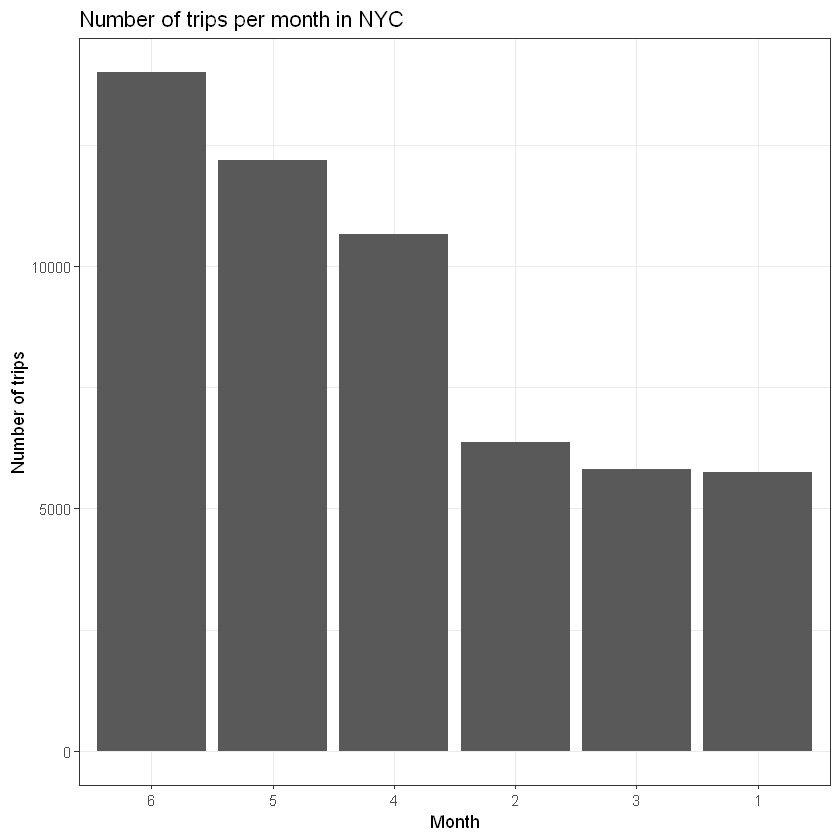

In [92]:
# Bar chart for WASH trips per month
bikeshare %>%
  filter(city == 'NYC') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips per month in NYC ", 
       x = 'Month',
       y = 'Number of trips')

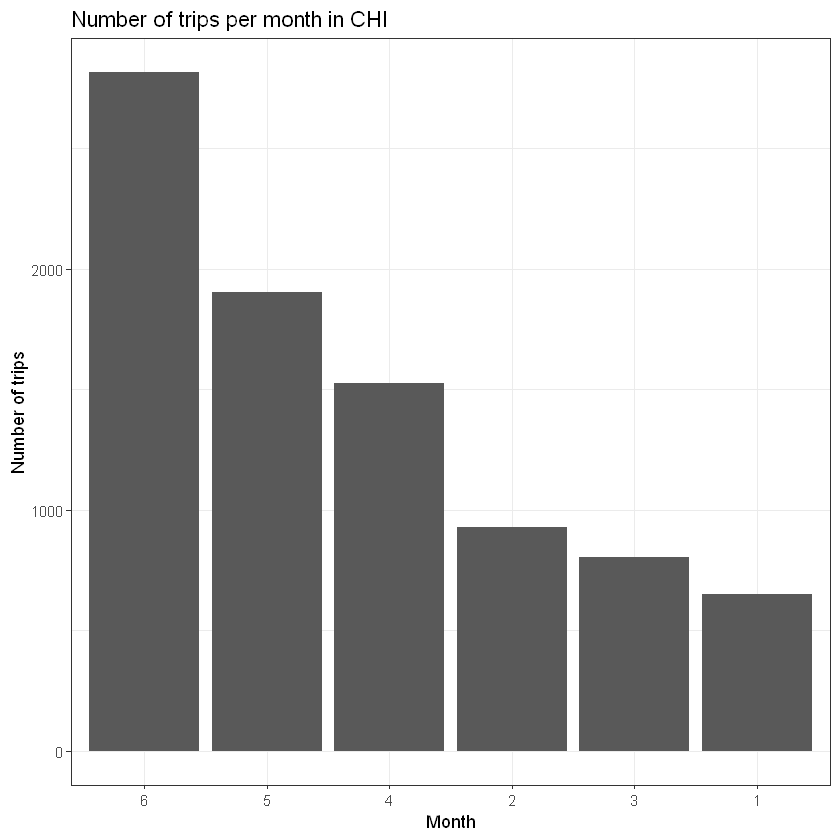

In [93]:
# Bar chart for WASH trips per month
bikeshare %>%
  filter(city == 'CHI') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips per month in CHI", 
       x = 'Month',
       y = 'Number of trips')

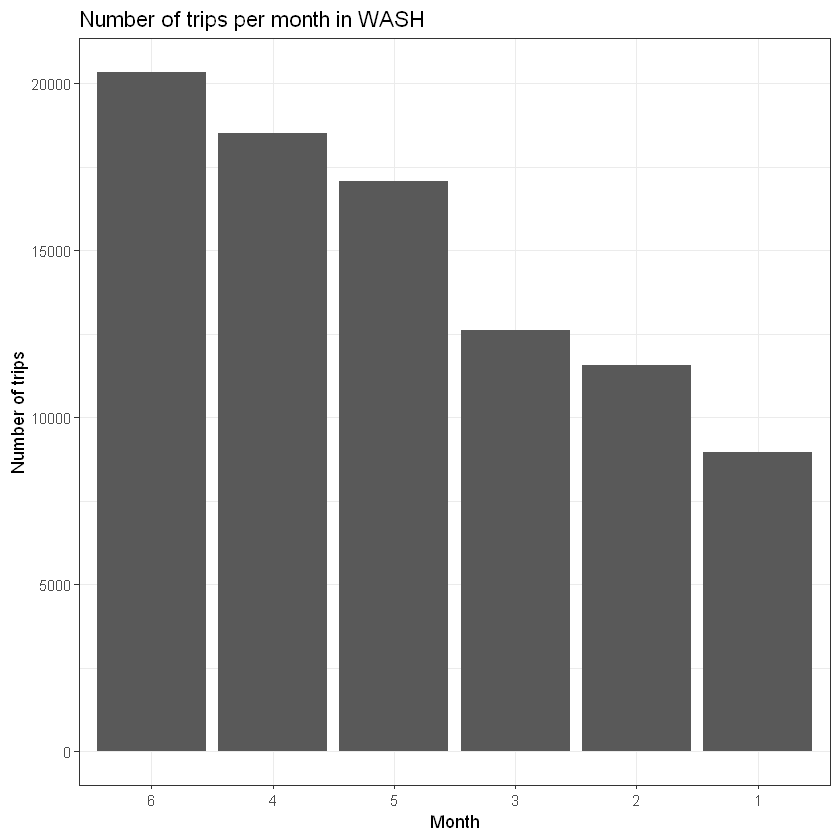

In [94]:
# Bar chart for WASH trips per month
bikeshare %>%
  filter(city == 'WASH') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips per month in WASH", 
       x = 'Month',
       y = 'Number of trips')

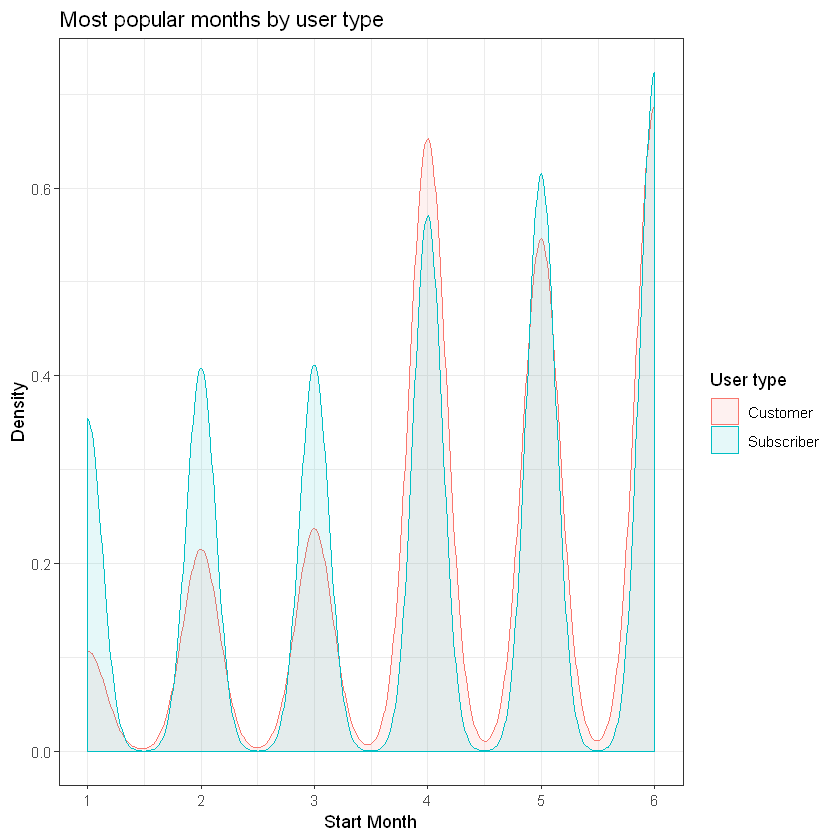

In [95]:
# Density plot
bikeshare %>%
  filter(user_type %in% c("Subscriber", "Customer")) %>%
  ggplot(aes(start_month, color = user_type, fill = user_type)) +
  scale_x_continuous(breaks = scales::pretty_breaks(n=6)) +
  geom_density(alpha = 0.1) +
  theme_bw() +
  labs(title = 'Most popular months by user type', 
       x = 'Start Month',
       y = 'Density',
       color = 'User type',
       fill = 'User type')

### What is the most common start station?

In [96]:
bikeshare %>%
  count(start_station, sort=TRUE) 

start_station,n
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488
Massachusetts Ave & Dupont Circle NW,1219
Jefferson Memorial,1068
15th & P St NW,1040
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1010
Henry Bacon Dr & Lincoln Memorial Circle NW,910
4th St & Madison Dr NW,894
Eastern Market Metro / Pennsylvania Ave & 7th St SE,823


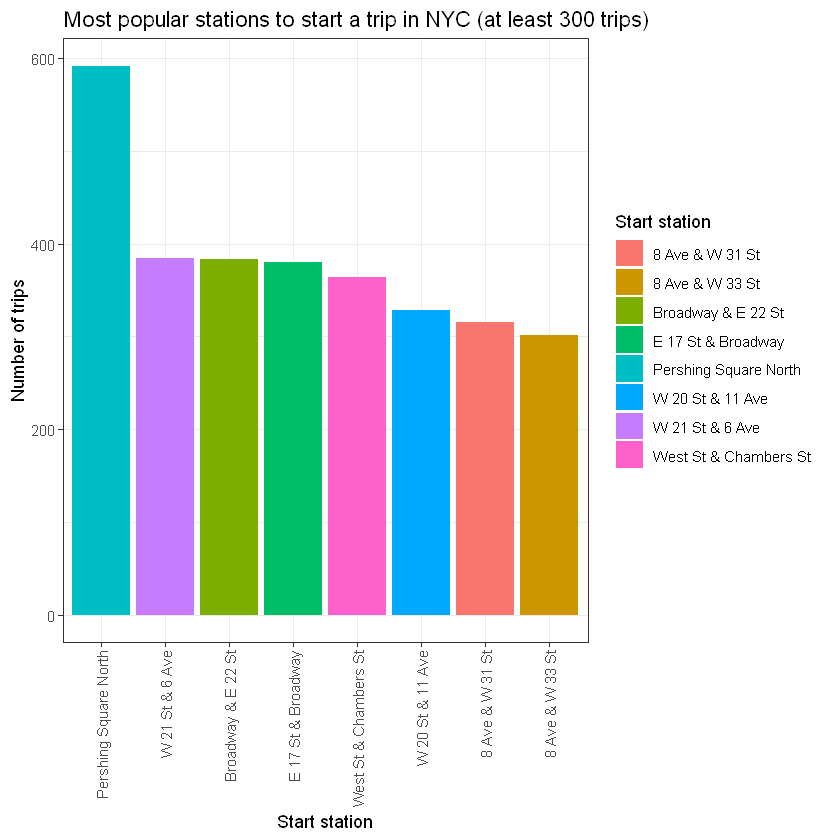

In [97]:
# Bar chart for NYC most popular stations
bikeshare %>%
  filter(city == 'NYC') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 300) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in NYC (at least 300 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

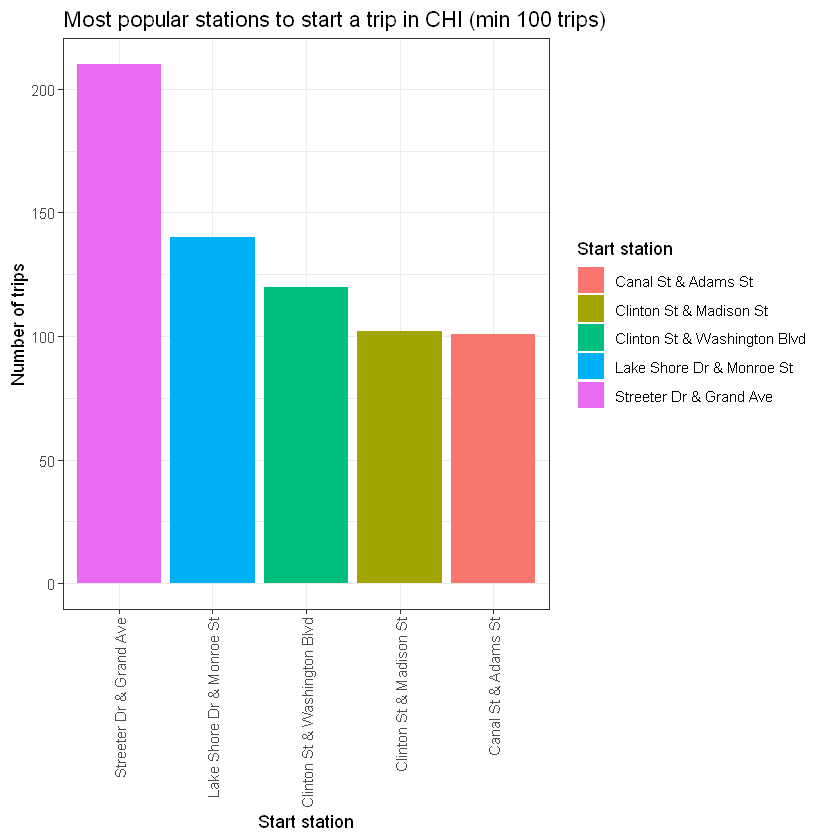

In [98]:
# Bar chart for CHI most popular stations
bikeshare %>%
  filter(city == 'CHI') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 100) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in CHI (min 100 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

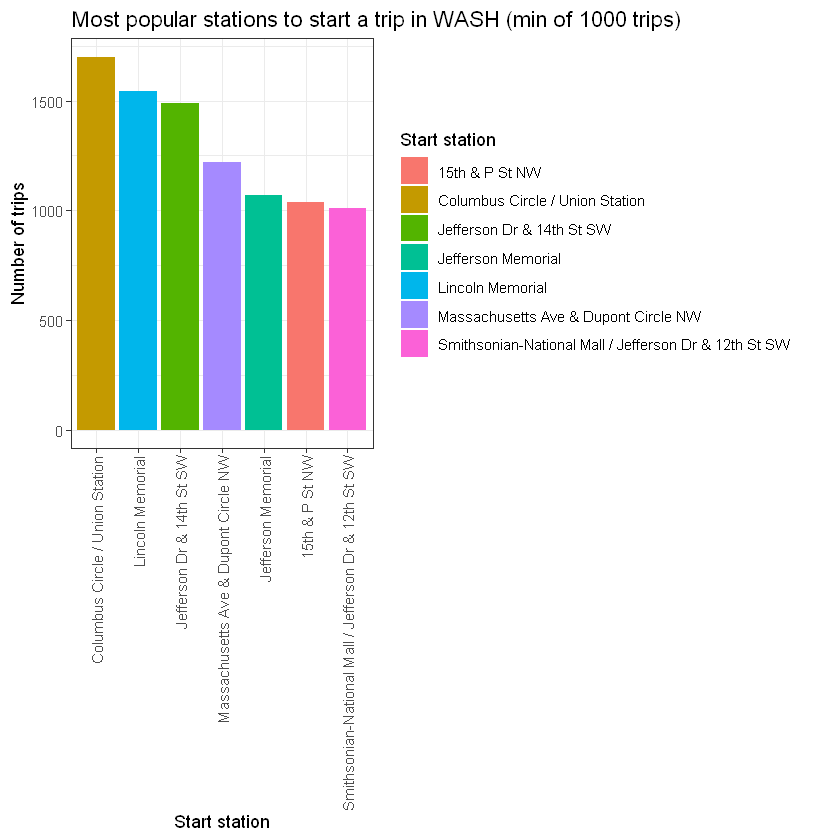

In [99]:
# Bar chart for WASH most popular stations
bikeshare %>%
  filter(city == 'WASH') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 1000) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in WASH (min of 1000 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

### What are the counts of each user type?

In [100]:
table(bikeshare$user_type)


             Customer Subscriber 
       119      30754     121576 

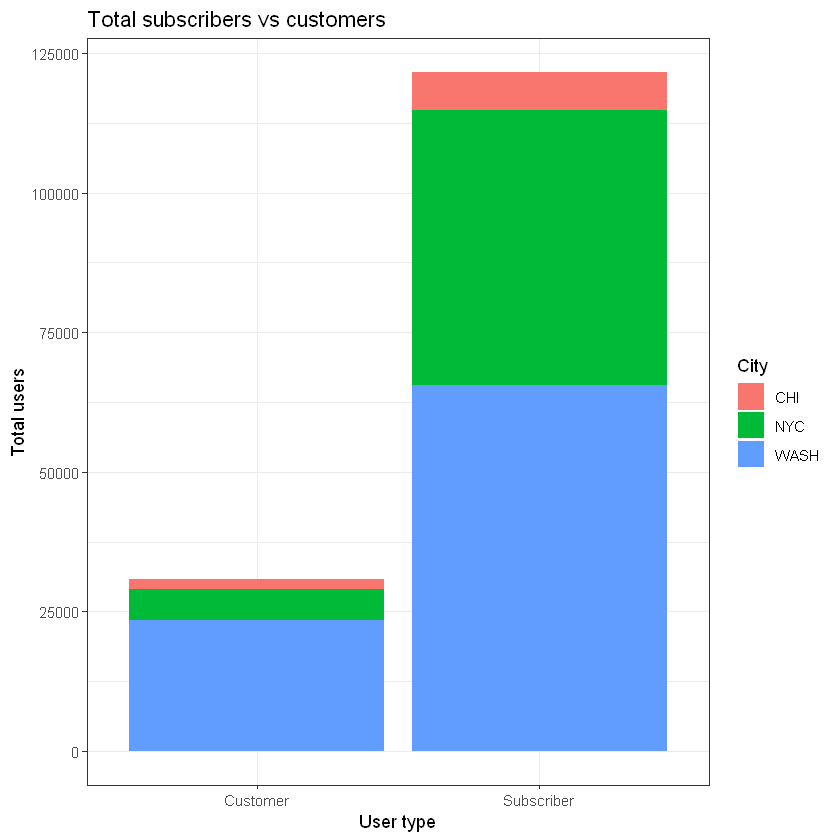

In [101]:
# Stacked Bar plots
bikeshare %>%
  filter(user_type %in% c("Subscriber", "Customer")) %>%
  ggplot(aes(user_type, fill = city)) +
  geom_bar() +
  theme_bw() +
  labs(title = 'Total subscribers vs customers',
       x = 'User type',
       y = 'Total users',
       fill = 'City')

<a id='conclusions'></a>
## Conclusions

#### Most common month (start month) for bike share use by user type
July is the most common month for trips (~24.4% of all trips) which is not surprising since that is the warmest month. 

Customers take more trips in April than Subscribers.

April is the second most common month for trips in Washington. 

#### Most common start station
Washington has the most number of trips per their most popular start stations, all are over 1,000 trips and none of the other cities have a start station that comes close to 1,000. 

Columbus Circle / Union Station	is the most popular station out of the entire dataset with 1,700 total trips. This station should have the most bikes avaiable.

#### Counts of each user type
Subscribers account of 79.7% of all trips taken.

Each city has more subscribers than customers.